## Instructions

Building Models that can make predictions of basketball tournament results based on historical data

Something to keep in mind is that when trying to predict results of basketball tournaments there are many variables that need to be taken into account. As a result of this creating accurate models is incredibly hard. In the sports betting industry an accuracy rate of anything over 55% is considered good as it indicates profits.

I will load a historical data set from previous seasons, clean the data, and apply different classification algorithms to the data. I will build the models using the following algorithms:

k-Nearest Neighbour

Decision Tree

Support Vector Machine

Logistic Regression

The results will be reported as the accuracy of each classifier, using the following metrics when applicable:

Jaccard index

F1-score

Accuracy
Logloss

In [1]:
# import the libraries

import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

ACQUIRING AND LOADING THE DATA FROM IBM CLOUD ENVIRONMENT

In [2]:
# loading the data
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%206/cbb.csv')
df.head()

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016
1,Villanova,BE,40,35,123.1,90.9,0.9703,56.1,46.7,16.3,...,30.0,57.4,44.1,36.2,33.9,66.7,8.9,Champions,2.0,2016
2,Notre Dame,ACC,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,...,26.0,52.9,46.5,37.4,36.9,65.5,2.3,E8,6.0,2016
3,Virginia,ACC,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,...,33.4,52.6,46.3,40.3,34.7,61.9,8.6,E8,1.0,2016
4,Kansas,B12,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,...,37.3,52.7,43.4,41.3,32.5,70.1,11.6,E8,1.0,2016


In [3]:
# checking the number of rows and columns (rows, column)
df.shape

(1406, 24)

In [4]:
# checking column names
df.columns

Index(['TEAM', 'CONF', 'G', 'W', 'ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D',
       'TOR', 'TORD', 'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O',
       '3P_D', 'ADJ_T', 'WAB', 'POSTSEASON', 'SEED', 'YEAR'],
      dtype='object')

# Add Column

Next we'll add a column that will contain "true" if the wins (WAB) above bubble are over 7 and "false" if not. We'll call this column Win Index or "windex" for short.

In [5]:
df['windex'] = np.where(df.WAB > 7, 'True', 'False')

# Data visualization and pre-processing

Next we'll filter the data set to the teams that made the Sweet Sixteen, the Elite Eight, and the Final Four in the post season. We'll also create a new dataframe that will hold the values with the new column.

In [6]:
# Getting the team that qualified for sweet sixteen s16, final four F4, and Elite Eight E8 stage 
df1 = df.loc[df['POSTSEASON'].str.contains('F4|S16|E8', na=False)]
df1.head()

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR,windex
2,Notre Dame,ACC,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,...,52.9,46.5,37.4,36.9,65.5,2.3,E8,6.0,2016,False
3,Virginia,ACC,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,...,52.6,46.3,40.3,34.7,61.9,8.6,E8,1.0,2016,True
4,Kansas,B12,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,...,52.7,43.4,41.3,32.5,70.1,11.6,E8,1.0,2016,True
5,Oregon,P12,37,30,118.4,96.2,0.9163,52.3,48.9,16.1,...,52.6,46.1,34.4,36.2,69.0,6.7,E8,1.0,2016,False
6,Syracuse,ACC,37,23,111.9,93.6,0.8857,50.0,47.3,18.1,...,47.2,48.1,36.0,30.7,65.5,-0.3,F4,10.0,2016,False


In [7]:
# Getting the actual number which will be used as the categorical value to build the prediction model later
df1['POSTSEASON'].value_counts()

S16    32
E8     16
F4      8
Name: POSTSEASON, dtype: int64

32 teams made it into the Sweet Sixteen, 16 into the Elite Eight, and 8 made it into the Final Four over 5 seasons.

Lets plot some columns to underestand the data better:

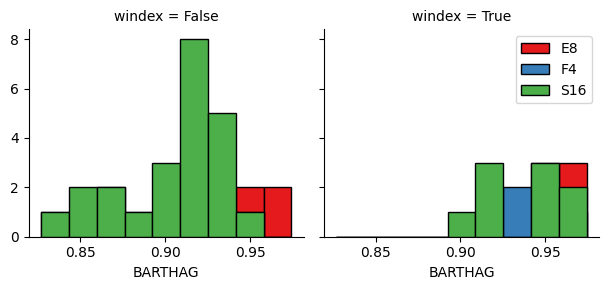

In [8]:
# Visualizing the information with seaborn

import seaborn as sns

bins = np.linspace(df1.BARTHAG.min(), df1.BARTHAG.max(), 10)
g = sns.FacetGrid(df1, col="windex", hue="POSTSEASON", palette="Set1", col_wrap=6)
g.map(plt.hist, 'BARTHAG', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

This code above creates a grid of histograms showing the distribution of 'BARTHAG' values, split by 'windex' column (which shows True if winning index is above 7) and colored by 'POSTSEASON'(containing E8,F4,S16), with 10 bins and a legend on the last subplot.

BARTHAG	Power Rating from the data column represents the Chance of beating an average Division I team.

WINDEX = TRUE, represents the BARTHAG condtion which represents the Chance of beating an average Division 1 team.

WINDEX = FALSE, represents the opposite of BARTHANG condition, ie. the chance of not beating an average Division 1 team.

Chart Components:
There are two separate charts for when ‘windex’ is True and False.
Each chart has bars colored to represent different ‘POSTSEASON’ stages.
The x-axis shows ‘BARTHAG’ values, and the y-axis shows how many times those values appear in the data.

Insights:
For ‘windex = False’(this condition represent the opposite of 'BARTHAG), the green bars (s16) are more frequent, suggesting teams with those ‘BARTHAG’ values(ie teams that can't beat an average Division 1 team), often reach the sweet sixteen (s16) stage. Team with a chance of approx 0.91 - 0.93 of not beating an average team, are most likely to qualify fot the sweet sixteen (s16) stage of the competition.
For ‘windex = True’, the distribution is more even, indicating no clear trend between ‘BARTHAG’ values and reaching different ‘POSTSEASON’ stages.
 






bins = np.linspace(df1.ADJOE.min(), df1.ADJOE.max(), 10)
g = sns.FacetGrid(df1, col="windex", hue="POSTSEASON", palette="Set1", col_wrap=2)
g.map(plt.hist, 'ADJOE', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

This code above creates a grid of histograms showing the distribution of 'ADJOE' values, divided by 'windex'column (which shows True if winning index is above 7)  and colored by 'POSTSEASON''(containing E8,F4,S16) using 10 bins and displaying a legend on the last subplot.

ADJOE	Adjusted Offensive Efficiency is An estimate of the offensive efficiency (points scored per 100 possessions) a team would have against the average Division I defense).

Windex = True: suggest that teams follow an offensive strategy

Windex = False:opposite, suggesting that a team does not follow an offensive strategy
 

Looking at the Windex = True: looking at the offensive efficiency frequency of between Appox 118 -120, the E8(in red) has highest values. This means the team accured Approx 118 - 120 offensive point, has the possibility of reaching the elite 8 (E8) stage.Also, the ADJOE frequency within Approx 115 - 117, represents the sweet 16 (s16). So team with offensive point of approx 115 - 117, has highest change of securing the sweet sixteen (s16) stage of the competition.  

Looking at the WIndex = False, opposite of the True; if a team doesn't follow the offensive strategy, it has high chance of getting to the sweet 16 (s16) stage of the competition

# Convert Categorical features to numerical values

Lets look at the post season:

In [9]:
df1.groupby(['windex'])['POSTSEASON'].value_counts(normalize=True)

windex  POSTSEASON
False   S16           0.605263
        E8            0.263158
        F4            0.131579
True    S16           0.500000
        E8            0.333333
        F4            0.166667
Name: POSTSEASON, dtype: float64

Lets convert wins above bubble (windex < 7 (represented as false in df1 column) to 0 and windex > 7 (represented as true in df1 column) to 1:


In [10]:
df1['windex'].replace(to_replace=['False','True'], value=[0,1],inplace=True)
df1.head()

C:\Users\User1\AppData\Local\Temp\ipykernel_9164\1994287662.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['windex'].replace(to_replace=['False','True'], value=[0,1],inplace=True)


,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR,windex
2,Notre Dame,ACC,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,...,52.9,46.5,37.4,36.9,65.5,2.3,E8,6.0,2016,0
3,Virginia,ACC,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,...,52.6,46.3,40.3,34.7,61.9,8.6,E8,1.0,2016,1
4,Kansas,B12,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,...,52.7,43.4,41.3,32.5,70.1,11.6,E8,1.0,2016,1
5,Oregon,P12,37,30,118.4,96.2,0.9163,52.3,48.9,16.1,...,52.6,46.1,34.4,36.2,69.0,6.7,E8,1.0,2016,0
6,Syracuse,ACC,37,23,111.9,93.6,0.8857,50.0,47.3,18.1,...,47.2,48.1,36.0,30.7,65.5,-0.3,F4,10.0,2016,0


# Feature selection

Let's define feature sets, X:

In [11]:
X = df1[['G', 'W', 'ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D',
       'TOR', 'TORD', 'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O',
       '3P_D', 'ADJ_T', 'WAB', 'SEED', 'windex']]
X[0:5]

,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,...,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,SEED,windex
2,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,14.8,32.7,...,32.9,26.0,52.9,46.5,37.4,36.9,65.5,2.3,6.0,0
3,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,18.8,29.9,...,32.1,33.4,52.6,46.3,40.3,34.7,61.9,8.6,1.0,1
4,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,18.5,32.2,...,38.6,37.3,52.7,43.4,41.3,32.5,70.1,11.6,1.0,1
5,37,30,118.4,96.2,0.9163,52.3,48.9,16.1,20.2,34.1,...,40.3,32.0,52.6,46.1,34.4,36.2,69.0,6.7,1.0,0
6,37,23,111.9,93.6,0.8857,50.0,47.3,18.1,20.4,33.5,...,35.4,28.0,47.2,48.1,36.0,30.7,65.5,-0.3,10.0,0


In [12]:
# lets convert our data to a numpy array
X = np.asarray(X[['G', 'W', 'ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D',
       'TOR', 'TORD', 'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O',
       '3P_D', 'ADJ_T', 'WAB', 'SEED', 'windex']])
X[0:5]

array([[ 36.    ,  24.    , 118.3   , 103.3   ,   0.8269,  54.    ,
         49.5   ,  15.3   ,  14.8   ,  32.7   ,  32.1   ,  32.9   ,
         26.    ,  52.9   ,  46.5   ,  37.4   ,  36.9   ,  65.5   ,
          2.3   ,   6.    ,   0.    ],
       [ 37.    ,  29.    , 119.9   ,  91.    ,   0.96  ,  54.8   ,
         48.4   ,  15.1   ,  18.8   ,  29.9   ,  25.2   ,  32.1   ,
         33.4   ,  52.6   ,  46.3   ,  40.3   ,  34.7   ,  61.9   ,
          8.6   ,   1.    ,   1.    ],
       [ 37.    ,  32.    , 120.9   ,  90.4   ,   0.9662,  55.7   ,
         45.1   ,  17.8   ,  18.5   ,  32.2   ,  27.9   ,  38.6   ,
         37.3   ,  52.7   ,  43.4   ,  41.3   ,  32.5   ,  70.1   ,
         11.6   ,   1.    ,   1.    ],
       [ 37.    ,  30.    , 118.4   ,  96.2   ,   0.9163,  52.3   ,
         48.9   ,  16.1   ,  20.2   ,  34.1   ,  30.5   ,  40.3   ,
         32.    ,  52.6   ,  46.1   ,  34.4   ,  36.2   ,  69.    ,
          6.7   ,   1.    ,   0.    ],
       [ 37.    ,  23.    , 

Let's define the dependent variable, y, assign it a 'POSTSEASON' feature from the original dataset (df1) and convert to numpy array:

In [13]:
y = np.asarray(df1['POSTSEASON'])
y[0:5]

array(['E8', 'E8', 'E8', 'E8', 'F4'], dtype=object)

# Normalize Data

Data Standardization gives data zero mean and unit variance

In [14]:
# lets normalize the independent variable data (X)
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-0.43331874, -1.26140173,  0.28034482,  2.74329908, -2.45717765,
         0.10027963,  0.94171924, -1.16188145, -1.71391372,  0.12750511,
         1.33368704, -0.4942211 , -0.87998988,  0.02784185,  0.00307239,
         0.22576157,  1.59744386, -1.12106011, -1.0448016 ,  0.49716104,
        -0.6882472 ],
       [ 0.40343468,  0.35874728,  0.64758014, -0.90102957,  1.127076  ,
         0.39390887,  0.38123706, -1.29466791, -0.03522254, -0.62979797,
        -1.31585883, -0.68542235,  0.55458056, -0.07167795, -0.0829545 ,
         1.32677295,  0.65081046, -2.369021  ,  0.98050611, -1.14054592,
         1.45296631],
       [ 0.40343468,  1.33083669,  0.87710222, -1.0788017 ,  1.29403598,
         0.72424177, -1.30020946,  0.49794919, -0.16112438, -0.00772758,
        -0.27908001,  0.86808783,  1.31063795, -0.03850468, -1.33034432,
         1.70643205, -0.29582294,  0.47355659,  1.94493836, -1.14054592,
         1.45296631],
       [ 0.40343468,  0.68277708,  0.30329703,  0.63966222

# Training and Validation

Split the data into Training and Validation data.

In [15]:
# We split the X into train and test to find the best k
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape) # for X_shape(row, columns),  for y_train shape(row)
print ('Validation set:', X_val.shape,  y_val.shape) # for X_val shape (row, columns), for y_val shape(row)

Train set: (44, 21) (44,)
Validation set: (12, 21) (12,)


# Classification

The model will be built with these supervised classification algorithm below. Then the validation set will be used to report the accuracy of the model.

K Nearest Neighbor(KNN)

Decision Tree

Support Vector Machine

Logistic Regression

# Building a model using k nearest neighbor (KNN)

In [16]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier



In [17]:
# Let train our data, using K=5 ie considering 5 closest neighbor for our prediction
# The model consider's what neighbourhood has the highest category, and then predicts the unknown to be 
# in that category/class. It will consider 5 neighborhood in this case

k = 5
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier()

In [18]:
# Lets make prediction with our trained data
y_train_pred = neigh.predict(X_train)
y_train_pred[0:5]


array(['S16', 'E8', 'E8', 'E8', 'E8'], dtype=object)

In [19]:
# Lets make prediction with our validation data
y_val_pred = neigh.predict(X_val)
y_val_pred[0:5]

array(['S16', 'S16', 'S16', 'E8', 'E8'], dtype=object)

In [20]:
# lets check the accuracy of our first fifteen validation data 
from sklearn import metrics
for k in range(16):# selecting range based on number of trainings assigned while splitting the data
    accuracy = metrics.accuracy_score(y_val, y_val_pred)
    print(f'Accuracy for k={k}: {accuracy:.2f}') # print accuracy in 2 decimal place

Accuracy for k=0: 0.67
Accuracy for k=1: 0.67
Accuracy for k=2: 0.67
Accuracy for k=3: 0.67
Accuracy for k=4: 0.67
Accuracy for k=5: 0.67
Accuracy for k=6: 0.67
Accuracy for k=7: 0.67
Accuracy for k=8: 0.67
Accuracy for k=9: 0.67
Accuracy for k=10: 0.67
Accuracy for k=11: 0.67
Accuracy for k=12: 0.67
Accuracy for k=13: 0.67
Accuracy for k=14: 0.67
Accuracy for k=15: 0.67


In [21]:
#the validation accuracy for this model is 67%, almost close to the 70% accuracy for a good model

# Building a model using Decision Tree Classifier

In [22]:
# Lets first print our original data
df1.head()

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR,windex
2,Notre Dame,ACC,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,...,52.9,46.5,37.4,36.9,65.5,2.3,E8,6.0,2016,0
3,Virginia,ACC,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,...,52.6,46.3,40.3,34.7,61.9,8.6,E8,1.0,2016,1
4,Kansas,B12,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,...,52.7,43.4,41.3,32.5,70.1,11.6,E8,1.0,2016,1
5,Oregon,P12,37,30,118.4,96.2,0.9163,52.3,48.9,16.1,...,52.6,46.1,34.4,36.2,69.0,6.7,E8,1.0,2016,0
6,Syracuse,ACC,37,23,111.9,93.6,0.8857,50.0,47.3,18.1,...,47.2,48.1,36.0,30.7,65.5,-0.3,F4,10.0,2016,0


In [23]:
# Because the data has been normalized, so we will re-use it for building subsequent models and not have to normalize it 
# any further

In [24]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
# Building the model with decision tree algorithm classifier.
# Inside the classifier, 'entropy' will be used as the specific criterion to see the information gain of each node
model = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
model

DecisionTreeClassifier(criterion='entropy', max_depth=4)

 Determine the minumum value for the parameter max_depth that improves results. This simply mean finding the shallowest decision tree (with the fewest layers of decisions) that still gives you good results when building a decision tree model.The best approach is to typically try different max_depth values and compare the model's performance on a validation set (data not used for training). The smallest max_depth that gives a good results should be the right one. 

Max_depth here will be 4, the model will loop/iterate through the range of max_depths and get the accuracy values

In [26]:
#List to store accuracy for each max_depth
depths = range(5)  # Check depths from 0 t0 4
accuracies = []

for depth in depths:
    #Initialize and train the model
    model = DecisionTreeClassifier(criterion="entropy", max_depth = 4, random_state=42)
    model.fit(X_train, y_train)
    
    # Predict on validation data
    y_val_pred = model.predict(X_val)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_val, y_val_pred)
    accuracies.append(accuracy)
    
    # Print accuracy for the current max_depth
    print(f'Accuracy for max_depth={depth}: {accuracy:.4f}')

Accuracy for max_depth=0: 0.3333
Accuracy for max_depth=1: 0.3333
Accuracy for max_depth=2: 0.3333
Accuracy for max_depth=3: 0.3333
Accuracy for max_depth=4: 0.3333


In [27]:
# from the above,the max_depth values all give same validation accuracy of around 33%; but the max_depth value = 0 
# has the smallest max_depth value and give same result as other depth, so should be the right answer.

Lets visualize the decision tree used to build the model

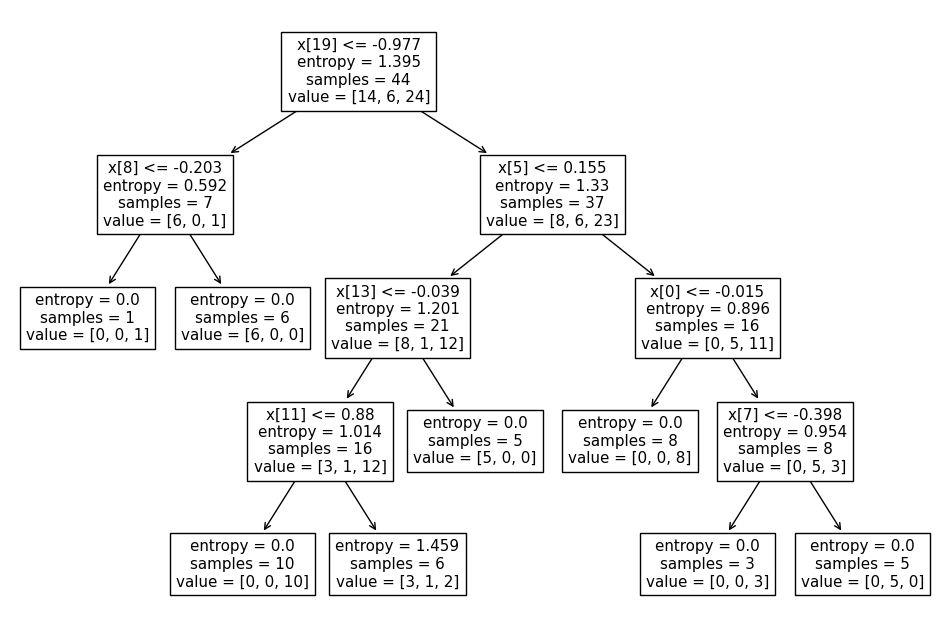

In [28]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plot_tree(model)
plt.show()

# Building a model using Support Vector Machine

Training the the data with different SVM Algorithm kernel and testing there accuracies



In [29]:
# Import the libraries
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Define SVM models with different kernels
Kernels = ['linear', 'poly', 'rbf', 'sigmoid']
models = {kernel: SVC(kernel=kernel, gamma='auto') for kernel in Kernels}

# Train and evaluate the models by their different kernels
for kernel, model1 in models.items():
    
    # Train the model
    model1.fit(X_train, y_train)
    
    # Predict on the validation data
    y_pred = model1.predict(X_val)
    
    # Evaluate the models
    accuracy = accuracy_score(y_val, y_pred)
    print(f"Kernels: {kernel}")# print out the different kernels
    print(f"Accuracy: {accuracy:.2f}") # print accuracy in 2 decimal
    print("Classification Report:")
    print(classification_report(y_val, y_pred))
    print("-" * 60) # this makes it easier to distinguish the different SVM model output, by using a seperator line (----)
    

Kernels: linear
Accuracy: 0.25
Classification Report:
              precision    recall  f1-score   support

          E8       0.14      0.50      0.22         2
          F4       0.00      0.00      0.00         2
         S16       0.40      0.25      0.31         8

    accuracy                           0.25        12
   macro avg       0.18      0.25      0.18        12
weighted avg       0.29      0.25      0.24        12

------------------------------------------------------------
Kernels: poly
Accuracy: 0.67
Classification Report:
              precision    recall  f1-score   support

          E8       0.00      0.00      0.00         2
          F4       0.00      0.00      0.00         2
         S16       0.67      1.00      0.80         8

    accuracy                           0.67        12
   macro avg       0.22      0.33      0.27        12
weighted avg       0.44      0.67      0.53        12

------------------------------------------------------------
Kernels: r

C:\Users\User1\Downloads\New folder\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User1\Downloads\New folder\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User1\Downloads\New folder\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User1\Downloa

In [30]:
# from the result so far, the SVM algorithm kernel that produces the best accuracy is the poly;with a validation accuracy of 0.67
# or 67%

# Building a model using Logistic Regression

In [31]:
# Import the libraries
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [32]:
# Predict on the validation data
y_pred = LR.predict(X_val)

In [33]:
 # Evaluate the model accuracy
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy:.2f}") # print accuracy in 2 decimal

Accuracy: 0.58


In [34]:
# the model has validation accuracy of 0.58

# Model Evaluation using Test set

Load a new dataset for testing and evaluating (accuracy, jaccard, f1 score and logloss) the supervised classification models -knn, decision tree, svm, logistic regression.

In [35]:
# loading the data from IBM cloud environment
test_df = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0120ENv3/Dataset/ML0101EN_EDX_skill_up/basketball_train.csv',error_bad_lines=False)
test_df.head()

C:\Users\User1\AppData\Local\Temp\ipykernel_9164\3828846349.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  test_df = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0120ENv3/Dataset/ML0101EN_EDX_skill_up/basketball_train.csv',error_bad_lines=False)


,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016
1,Villanova,BE,40,35,123.1,90.9,0.9703,56.1,46.7,16.3,...,30.0,57.4,44.1,36.2,33.9,66.7,8.9,Champions,2.0,2016
2,Notre Dame,ACC,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,...,26.0,52.9,46.5,37.4,36.9,65.5,2.3,E8,6.0,2016
3,Virginia,ACC,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,...,33.4,52.6,46.3,40.3,34.7,61.9,8.6,E8,1.0,2016
4,Kansas,B12,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,...,37.3,52.7,43.4,41.3,32.5,70.1,11.6,E8,1.0,2016


In [36]:
# Check exact column names
test_df.columns

Index(['TEAM', 'CONF', 'G', 'W', 'ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D',
       'TOR', 'TORD', 'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O',
       '3P_D', 'ADJ_T', 'WAB', 'POSTSEASON', 'SEED', 'YEAR'],
      dtype='object')

In [37]:
# Selecting were 'WAB' row is > 7 as true and where <7 as false and assign a new variable column to it "windex"
test_df['windex'] = np.where(test_df.WAB > 7, 'True', 'False')
# Ensure to select the F4, SI6, E8 rows from the 'POSTSEASON' column
test_df1 = test_df[test_df['POSTSEASON'].str.contains('F4|S16|E8', na=False)]
test_df1.head()


,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR,windex
2,Notre Dame,ACC,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,...,52.9,46.5,37.4,36.9,65.5,2.3,E8,6.0,2016,False
3,Virginia,ACC,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,...,52.6,46.3,40.3,34.7,61.9,8.6,E8,1.0,2016,True
4,Kansas,B12,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,...,52.7,43.4,41.3,32.5,70.1,11.6,E8,1.0,2016,True
5,Oregon,P12,37,30,118.4,96.2,0.9163,52.3,48.9,16.1,...,52.6,46.1,34.4,36.2,69.0,6.7,E8,1.0,2016,False
6,Syracuse,ACC,37,23,111.9,93.6,0.8857,50.0,47.3,18.1,...,47.2,48.1,36.0,30.7,65.5,-0.3,F4,10.0,2016,False


In [38]:
# Select the column - from the original test dataset- to be used for testing
test_Feature = test_df1[['G', 'W', 'ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D',
       'TOR', 'TORD', 'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O',
       '3P_D', 'ADJ_T', 'WAB', 'SEED', 'windex']]


In [39]:
test_Feature[0:5]

,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,...,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,SEED,windex
2,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,14.8,32.7,...,32.9,26.0,52.9,46.5,37.4,36.9,65.5,2.3,6.0,False
3,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,18.8,29.9,...,32.1,33.4,52.6,46.3,40.3,34.7,61.9,8.6,1.0,True
4,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,18.5,32.2,...,38.6,37.3,52.7,43.4,41.3,32.5,70.1,11.6,1.0,True
5,37,30,118.4,96.2,0.9163,52.3,48.9,16.1,20.2,34.1,...,40.3,32.0,52.6,46.1,34.4,36.2,69.0,6.7,1.0,False
6,37,23,111.9,93.6,0.8857,50.0,47.3,18.1,20.4,33.5,...,35.4,28.0,47.2,48.1,36.0,30.7,65.5,-0.3,10.0,False


In [40]:
# Replacing the 'windex' column with; 0 for false and 1 for true
test_Feature['windex'].replace(to_replace=['False','True'], value=[0,1],inplace=True)
test_Feature.head()

C:\Users\User1\AppData\Local\Temp\ipykernel_9164\1954863727.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_Feature['windex'].replace(to_replace=['False','True'], value=[0,1],inplace=True)


,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,...,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,SEED,windex
2,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,14.8,32.7,...,32.9,26.0,52.9,46.5,37.4,36.9,65.5,2.3,6.0,0
3,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,18.8,29.9,...,32.1,33.4,52.6,46.3,40.3,34.7,61.9,8.6,1.0,1
4,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,18.5,32.2,...,38.6,37.3,52.7,43.4,41.3,32.5,70.1,11.6,1.0,1
5,37,30,118.4,96.2,0.9163,52.3,48.9,16.1,20.2,34.1,...,40.3,32.0,52.6,46.1,34.4,36.2,69.0,6.7,1.0,0
6,37,23,111.9,93.6,0.8857,50.0,47.3,18.1,20.4,33.5,...,35.4,28.0,47.2,48.1,36.0,30.7,65.5,-0.3,10.0,0


In [41]:
# lets convert our data to a numpy array and assign to variable test_Feature1
test_Feature1 = np.asarray(test_Feature[['G', 'W', 'ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D',
       'TOR', 'TORD', 'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O',
       '3P_D', 'ADJ_T', 'WAB', 'SEED', 'windex']])
test_Feature1[0:5]

array([[ 36.    ,  24.    , 118.3   , 103.3   ,   0.8269,  54.    ,
         49.5   ,  15.3   ,  14.8   ,  32.7   ,  32.1   ,  32.9   ,
         26.    ,  52.9   ,  46.5   ,  37.4   ,  36.9   ,  65.5   ,
          2.3   ,   6.    ,   0.    ],
       [ 37.    ,  29.    , 119.9   ,  91.    ,   0.96  ,  54.8   ,
         48.4   ,  15.1   ,  18.8   ,  29.9   ,  25.2   ,  32.1   ,
         33.4   ,  52.6   ,  46.3   ,  40.3   ,  34.7   ,  61.9   ,
          8.6   ,   1.    ,   1.    ],
       [ 37.    ,  32.    , 120.9   ,  90.4   ,   0.9662,  55.7   ,
         45.1   ,  17.8   ,  18.5   ,  32.2   ,  27.9   ,  38.6   ,
         37.3   ,  52.7   ,  43.4   ,  41.3   ,  32.5   ,  70.1   ,
         11.6   ,   1.    ,   1.    ],
       [ 37.    ,  30.    , 118.4   ,  96.2   ,   0.9163,  52.3   ,
         48.9   ,  16.1   ,  20.2   ,  34.1   ,  30.5   ,  40.3   ,
         32.    ,  52.6   ,  46.1   ,  34.4   ,  36.2   ,  69.    ,
          6.7   ,   1.    ,   0.    ],
       [ 37.    ,  23.    , 

In [42]:
# Reassigning test_Feature1 to a new variable name test_X  
test_X=test_Feature1
# Normalizing the  feature data (test_X)
test_X= preprocessing.StandardScaler().fit(test_X).transform(test_X)
# Getting the first 5 dataset
test_X[0:5]

array([[-4.08074446e-01, -1.10135297e+00,  3.37365934e-01,
         2.66479976e+00, -2.46831661e+00,  2.13703245e-01,
         9.44090550e-01, -1.19216365e+00, -1.64348924e+00,
         1.45405982e-02,  1.29523097e+00, -6.23533182e-01,
        -9.31788560e-01,  1.42784371e-01,  1.68876201e-01,
         2.84500844e-01,  1.62625961e+00, -8.36649260e-01,
        -9.98500539e-01,  4.84319174e-01, -6.77003200e-01],
       [ 3.63958290e-01,  3.26326807e-01,  7.03145068e-01,
        -7.13778644e-01,  1.07370841e+00,  4.82633172e-01,
         4.77498943e-01, -1.32975879e+00, -6.86193316e-02,
        -7.35448152e-01, -1.35447914e+00, -8.06829025e-01,
         3.41737757e-01,  4.96641291e-02,  9.40576311e-02,
         1.37214061e+00,  6.93854620e-01, -2.00860931e+00,
         9.80549967e-01, -1.19401460e+00,  1.47709789e+00],
       [ 3.63958290e-01,  1.18293467e+00,  9.31757027e-01,
        -8.78587347e-01,  1.23870131e+00,  7.85179340e-01,
        -9.22275877e-01,  5.27775662e-01, -1.86734575e

In [43]:
# Assign the 'postseason' column -from the original test dataset- to  a variable test_y and convert to numpy array
test_y = np.asarray(test_df1['POSTSEASON'])
# Print first 5 dataset
test_y[0:5]

array(['E8', 'E8', 'E8', 'E8', 'F4'], dtype=object)

In [44]:
# Print the shape of test_x and test_y
print ('Test set:', test_X.shape, test_y.shape)

Test set: (70, 21) (70,)


# Getting the accuracy, jaccard, fl score and logloss for the test data

# KNN Model accuracy, jaccard, and fl score

In [45]:
# Lets make prediction with our test data using the already built KNN model 
y_test_pred = neigh.predict(test_X)
y_test_pred[0:5]

array(['S16', 'S16', 'E8', 'E8', 'E8'], dtype=object)

In [46]:
# lets evaluate the accuracy of our KNN model
from sklearn import metrics
print("Test set Accuracy = ", metrics.accuracy_score(test_y, y_test_pred))

Test set Accuracy =  0.6285714285714286


In [47]:
# Evaluate f1 score for KNN
from sklearn.metrics import f1_score
print("F1 score =", f1_score(test_y, y_test_pred, average='weighted')) 

F1 score = 0.62031212484994


In [48]:
# Evaluating the jaccard score for KNN
from sklearn.metrics import jaccard_score
print("jaccard score =", jaccard_score(test_y, y_test_pred, average='weighted' ))

jaccard score = 0.4642857142857143


# Decision Tree Classifier Model accuracy, jaccard, and fl score

In [49]:
# Lets make prediction with our test data using the already built Decision tree Classifier model 
y_test_pred = model.predict(test_X)
y_test_pred[0:5]

array(['S16', 'E8', 'E8', 'E8', 'S16'], dtype=object)

In [50]:
# lets evaluate the accuracy of our Decision Tree Classifier model
from sklearn import metrics
print("Test set Accuracy = ", metrics.accuracy_score(test_y, y_test_pred))

Test set Accuracy =  0.7142857142857143


In [51]:
# Evaluate f1 score for Decision Tree Classifier model
from sklearn.metrics import f1_score
print("F1 score =", f1_score(test_y, y_test_pred, average='weighted')) 

F1 score = 0.7135423075345557


In [52]:
# Evaluating the jaccard score for Decision Tree  Classifier model
from sklearn.metrics import jaccard_score
print("jaccard score =", jaccard_score(test_y, y_test_pred, average='weighted' ))

jaccard score = 0.5619224313101864


# Support Vector Machine (SVM) Model accuracy, jaccard, and fl score

In [53]:
# Lets make prediction with our test data using the already built SVM model 
y_test_pred = model1.predict(test_X)
y_test_pred[0:5]

array(['S16', 'S16', 'S16', 'E8', 'S16'], dtype=object)

In [54]:
# lets evaluate the accuracy of our SVM model
from sklearn import metrics

test_accuracy = metrics.accuracy_score(test_y, y_test_pred)
formatted_accuracy = "{:.2f}".format(test_accuracy)

print("Test set Accuracy = ", formatted_accuracy)


Test set Accuracy =  0.60


In [55]:
# Evaluating the jaccard score for SVM
from sklearn.metrics import jaccard_score
print("jaccard score =", jaccard_score(test_y, y_test_pred, average='weighted' ))

jaccard score = 0.4047619047619048


In [56]:
# Evaluate f1 score for SVM model
from sklearn.metrics import f1_score
print("F1 score =", f1_score(test_y, y_test_pred, average='weighted')) 

F1 score = 0.5353383458646617


# Logistic Regression Model accuracy, jaccard, and fl score

In [57]:
# Lets make prediction with our test data using the already built logistic Regression model 
y_test_pred = LR.predict(test_X)
y_test_pred[0:5]

array(['S16', 'S16', 'E8', 'E8', 'F4'], dtype=object)

In [58]:
# lets evaluate the accuracy of our logistic Regression model
from sklearn import metrics

test_accuracy = metrics.accuracy_score(test_y, y_test_pred)

print("Test set Accuracy = ", test_accuracy)


Test set Accuracy =  0.6857142857142857


In [59]:
# Evaluating the jaccard score for Logistic Regression model
from sklearn.metrics import jaccard_score
print("jaccard score =", jaccard_score(test_y, y_test_pred, average='weighted' ))

jaccard score = 0.5313852813852814


In [60]:
# Evaluate f1 score for logistic Regression model
from sklearn.metrics import f1_score
print("F1 score =", f1_score(test_y, y_test_pred, average='weighted')) 

F1 score = 0.6899251963841629


In [61]:
# Evaluate the logloss for Logistic Regression model

from sklearn.preprocessing import LabelBinarizer

# Convert all elements to strings to avoid type errors
test_y = test_y.astype(str)
y_test_pred = y_test_pred.astype(str)

# List of unique classes
unique_classes = np.unique(np.concatenate((test_y, y_test_pred)))
class_to_index = {cls: idx for idx, cls in enumerate(unique_classes)}

# Convert class labels to integer indices
test_y_int = np.array([class_to_index[cls] for cls in test_y])
y_test_pred_int = np.array([class_to_index[cls] for cls in y_test_pred])

# One-hot encode the true labels
lb = LabelBinarizer()
lb.fit(test_y_int)
test_y_onehot = lb.transform(test_y_int)

# Convert predicted class labels to probabilities (one-hot encoding)
y_test_pred_onehot = lb.transform(y_test_pred_int)

# Ensure that one-hot encoded predictions have the same shape as true labels
if y_test_pred_onehot.shape[1] != test_y_onehot.shape[1]:
    y_test_pred_onehot = np.hstack([y_test_pred_onehot, np.zeros((y_test_pred_onehot.shape[0], test_y_onehot.shape[1] - y_test_pred_onehot.shape[1]))])

# Calculate log loss
from sklearn.metrics import log_loss

log_loss_value = log_loss(test_y_onehot, y_test_pred_onehot)
print("Log Loss =", log_loss_value)

Log Loss = 11.328005350865391


# Report

Accuracies of the built supervised -classification type- models using different evaluation metrics:

|Algorithm          |    Accuracy        |    Jaccard        |   F1-score       |  LogLoss         |
|-------------------|--------------------|-------------------|------------------|------------------| 
|KNN                | 0.6285714285714286 |0.4642857142857143 | 0.62031212484994 |    NA            |
|Decision Tree	    | 0.7142857142857143 |0.5619224313101864 |0.7135423075345557|    NA            |
|SVM	            | 0.60               |0.4047619047619048 |0.5353383458646617|    NA            |
|LogisticRegression	|0.6857142857142857  | 0.5313852813852814|0.6899251963841629|11.328005350865391|
